<a href="https://colab.research.google.com/github/mirrussell/Global-Socio-Economic-Indicators/blob/main/Initial_Results_and_the_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook presents the data cleaning, exploratory data analysis and feature engineering using data from [Gapminder](https://www.gapminder.org/data/) that will be used for linear, polynomial and logarithmic regression in another notebook.

# Import packages and data

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# load the datset (csv files)
data = pd.read_csv("https://raw.githubusercontent.com/BME1478H/Winter2022class/master/data/world-data-gapminder.csv")

# Description of data set and a summary of its attributes

This data set has been generated using data from [the Gapminder website](https://www.gapminder.org/data/), which focuses on gathering and sharing statistics and other information about social, economic and environmental development at local, national and global levels.

This particular data set describes the values of several parameters (see the list below) between 1800 and 2018 for a total of 192 countries. The parameters included in the data set and the column name of the dataframe are as follows:

* Country (country): Describes the country name
* Year (year): Describes the year to which the data belongs
* Population(population): Describes the number of population.
* Region (region): Describes the region to which the country belongs
*Sub Region (sub_region): Describes the sub-region to which the country belongs.
* Income Group (income_group): Classifies the people into income levels orclasses.
* Life expectancy (life_expectancy): Describes the life expectancy for a given country in a given year
* Income (income): Describes the Income per person in dollars for a given country in a given year
* Children per woman (children_per-woman): Describes average number of children per woman
* Child Mortality (child-mortality): Describe number of child mortality in a country.
* Population Density (pop_density): Describes the population density in a country.
* CO2 emissions per capita (co2_per_capita): Describes the CO2 emissions in tonnes per person for a given country in a given year
* Years in school for Men (years_in_school_men): Describe the number of years on average a men spent in school
* Years in school for Women (years_in_school_women): Describe the number of years on average an women spent in school

Let's have a look at the data.

Let's check the data types and the number of samples for each column:

In [72]:
#Dataset chekup
data.sample(n=10)

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
8065,"Congo, Rep.",1981,1890000,Africa,Sub-Saharan Africa,Lower middle,53.5,4890,6.13,106.0,5.55,0.250,6.00,3.68
17719,Jordan,1999,5010000,Asia,Western Asia,Upper middle,73.0,7060,4.13,28.6,56.50,2.910,10.30,9.78
994,Antigua and Barbuda,1918,30400,Americas,Latin America and the Caribbean,High,21.9,1600,4.56,182.0,NaN,NaN,NaN,NaN
344,Albania,1925,989000,Europe,Southern Europe,Upper middle,35.5,1620,4.60,355.0,NaN,NaN,NaN,NaN
30671,Slovak Republic,1811,2140000,Europe,Eastern Europe,High,36.4,1430,5.94,363.0,NaN,NaN,NaN,NaN
37625,Uruguay,1976,2840000,Americas,Latin America and the Caribbean,High,69.0,8570,2.95,54.5,16.20,2.080,6.67,6.83
4522,Bosnia and Herzegovina,1942,2470000,Europe,Southern Europe,Upper middle,27.6,1220,5.19,259.0,NaN,NaN,NaN,NaN
11662,Fiji,1855,135000,Oceania,Melanesia,Upper middle,26.1,886,6.45,499.0,NaN,NaN,NaN,NaN
24228,Namibia,1938,318000,Africa,Sub-Saharan Africa,Upper middle,34.8,3190,5.96,308.0,NaN,NaN,NaN,NaN
10896,Equatorial Guinea,1965,277000,Africa,Sub-Saharan Africa,Upper middle,42.4,1130,5.73,290.0,9.89,0.106,NaN,NaN


In [73]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

       country  year  population region     sub_region income_group  \
0  Afghanistan  1800     3280000   Asia  Southern Asia          Low   
1  Afghanistan  1801     3280000   Asia  Southern Asia          Low   
2  Afghanistan  1802     3280000   Asia  Southern Asia          Low   
3  Afghanistan  1803     3280000   Asia  Southern Asia          Low   
4  Afghanistan  1804     3280000   Asia  Southern Asia          Low   

   life_expectancy  income  children_per_woman  child_mortality  pop_density  \
0             28.2     603                 7.0            469.0          NaN   
1             28.2     603                 7.0            469.0          NaN   
2             28.2     603                 7.0            469.0          NaN   
3             28.2     603                 7.0            469.0          NaN   
4             28.2     603                 7.0            469.0          NaN   

   co2_per_capita  years_in_school_men  years_in_school_women  
0             NaN           

In [74]:
# Display data types
print(data.dtypes)

country                   object
year                       int64
population                 int64
region                    object
sub_region                object
income_group              object
life_expectancy          float64
income                     int64
children_per_woman       float64
child_mortality          float64
pop_density              float64
co2_per_capita           float64
years_in_school_men      float64
years_in_school_women    float64
dtype: object


In [75]:
# List of columns for reference in the analyses below
print(data.columns)

Index(['country', 'year', 'population', 'region', 'sub_region', 'income_group',
       'life_expectancy', 'income', 'children_per_woman', 'child_mortality',
       'pop_density', 'co2_per_capita', 'years_in_school_men',
       'years_in_school_women'],
      dtype='object')


In [76]:
# For categorical attributes, let's look at the frequency of countries or other categorical fields
print(data['country'].value_counts())  # Assuming 'country' is one of the columns

United States    438
Afghanistan      219
Panama           219
New Zealand      219
Nicaragua        219
                ... 
Greece           219
Grenada          219
Guatemala        219
Guinea           219
Zimbabwe         219
Name: country, Length: 178, dtype: int64


In [77]:
# Basic information about the dataset
print(data.info())
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                39201 non-null  object 
 1   year                   39201 non-null  int64  
 2   population             39201 non-null  int64  
 3   region                 39201 non-null  object 
 4   sub_region             39201 non-null  object 
 5   income_group           39201 non-null  object 
 6   life_expectancy        39201 non-null  float64
 7   income                 39201 non-null  int64  
 8   children_per_woman     39201 non-null  float64
 9   child_mortality        39199 non-null  float64
 10  pop_density            12351 non-null  float64
 11  co2_per_capita         16500 non-null  float64
 12  years_in_school_men    8234 non-null   float64
 13  years_in_school_women  8234 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 4.2+ 

# Initial plan for data exploration


The initial plan for data exploration is as follows:


*Data cleaning: The data cleaning process is split into following two main actions . . .
  #Null values: Understand the reason why there are null values to find out the best way to deal with them.
  
  #Outliers: Similarly to the null values, the first step is to understand the presence of outliers as well as to find out if removing them is a good idea or it's actually valuable data.

*Feature extraction: Understand the relationship between the different features, perform transformation to help improve those relationships and perform Principal Component Analyisis to understand how some of the features explain the HDI index variance

*Feature extraction: Understand the relationship between the different features, perform transformation to help improve those relationships and perform Principal Component Analyisis to understand how some of the features explain the HDI index variance

*Hypothesis testing: Formulate three hypotheses and test one of them

Next, Let's find out how many null values there are:

In [78]:
# To find out the number of Null values
data.isnull().sum()

country                      0
year                         0
population                   0
region                       0
sub_region                   0
income_group                 0
life_expectancy              0
income                       0
children_per_woman           0
child_mortality              2
pop_density              26850
co2_per_capita           22701
years_in_school_men      30967
years_in_school_women    30967
dtype: int64

# Data cleaning

## Null values

Data cleaning is always tricky and this dataset isn't an exception. In fact, it's even trickier because the number of samples, 39202, is spread accross 218 different years. This means that there are 218 different sub-datasets with around 205 elements each. Therefore, the sample size is relatively small and the impact of each value in the final metrics is greater. One needs to be careful and undrestand the reason behind the `NaN` values before replacing or deleting them.

Prior to the analysis, I considered the following techniques to deal with null values:

* Remove them, provided that we don't lose a lot of data
* Impute data using the one of the following options:
    * Mean value
    * Most common value
    * Interpolation provided that there is enough data to make a prediction

However, let's starts by checking which are the null values and try to understand why there are missing values.

In [79]:
data[data.isna().any(axis=1)]

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39151,Zimbabwe,1969,5010000,Africa,Sub-Saharan Africa,Low,57.2,2160,7.42,115.0,12.9,1.35,NaN,NaN
39197,Zimbabwe,2015,15800000,Africa,Sub-Saharan Africa,Low,58.3,1890,3.84,59.9,40.8,NaN,11.1,10.2
39198,Zimbabwe,2016,16200000,Africa,Sub-Saharan Africa,Low,59.3,1860,3.76,56.4,41.7,NaN,NaN,NaN
39199,Zimbabwe,2017,16500000,Africa,Sub-Saharan Africa,Low,59.8,1910,3.68,56.8,42.7,NaN,NaN,NaN


Let's have a look at the list of unique countries and years whose rows include null values for the `pop_density`Column:

In [80]:
print(set(data[data["pop_density"].isna()]["country"]))

print(set(data[data["pop_density"].isna()]["year"]))

{'Tanzania', 'Montenegro', 'India', 'Israel', 'Haiti', 'Saudi Arabia', 'North Korea', 'Estonia', 'Nigeria', 'Mozambique', 'Azerbaijan', 'Belarus', 'Chile', 'Hungary', 'Italy', 'El Salvador', 'Liberia', 'Botswana', 'Bosnia and Herzegovina', 'Lithuania', 'Mauritius', 'Latvia', 'South Sudan', 'Barbados', 'South Africa', 'Nicaragua', 'Iraq', 'Egypt', 'Cameroon', 'Brazil', 'Portugal', 'Canada', 'Uganda', 'Cyprus', 'Afghanistan', 'Japan', 'Georgia', 'Ecuador', 'Ukraine', 'Ethiopia', 'Solomon Islands', 'Kenya', 'Mali', 'Philippines', 'Djibouti', 'Bangladesh', 'Denmark', 'Gabon', 'Kiribati', 'Rwanda', 'Tonga', 'Luxembourg', 'Sri Lanka', 'Czech Republic', 'New Zealand', 'Norway', 'Malawi', 'Senegal', 'Burundi', 'Oman', 'Mauritania', 'Netherlands', 'Nepal', "Cote d'Ivoire", 'Dominican Republic', 'Lesotho', 'Guinea-Bissau', 'Mongolia', 'Yemen', 'Bhutan', 'Fiji', 'Finland', 'Burkina Faso', 'Niger', 'Seychelles', 'Turkey', 'Myanmar', 'Austria', 'Jamaica', 'Bahamas', 'Gambia', 'Malaysia', 'Poland', 

It makes sense to see some of these countries and years as some of them declared their independence recently, others underwent foreign military occupations or wars.

Next, Let's follow a similar approach for the 'co2_per_capita' column:

In [81]:
data[data["co2_per_capita"].isna()].sample(n=10)

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
30591,Singapore,1950,1020000,Asia,South-eastern Asia,High,58.8,5030,6.49,117.0,1460.00,NaN,NaN,NaN
8633,Croatia,1892,2310000,Europe,Southern Europe,High,36.0,2670,5.53,367.0,NaN,NaN,NaN,NaN
26733,Panama,1815,79900,Americas,Latin America and the Caribbean,High,32.9,849,5.36,406.0,NaN,NaN,NaN,NaN
38351,Vietnam,1826,6980000,Asia,South-eastern Asia,Lower middle,32.0,860,4.70,417.0,NaN,NaN,NaN,NaN
37498,Uruguay,1849,137000,Americas,Latin America and the Caribbean,High,32.9,3480,5.80,406.0,NaN,NaN,NaN,NaN
6024,Cameroon,1911,2360000,Africa,Sub-Saharan Africa,Lower middle,30.2,974,5.54,451.0,NaN,NaN,NaN,NaN
23932,Myanmar,1861,4100000,Asia,South-eastern Asia,Lower middle,30.8,847,6.03,433.0,NaN,NaN,NaN,NaN
2888,Barbados,1841,116000,Americas,Latin America and the Caribbean,High,32.1,1060,5.36,543.0,NaN,NaN,NaN,NaN
4110,Bhutan,1968,280000,Asia,Southern Asia,Lower middle,46.8,1040,6.67,291.0,7.33,NaN,NaN,NaN
29136,Samoa,1809,47200,Oceania,Polynesia,Upper middle,25.4,1400,6.98,443.0,NaN,NaN,NaN,NaN


In [82]:
print(set(data[data["co2_per_capita"].isna()]["country"]))

print(set(data[data["co2_per_capita"].isna()]["year"]))

{'Tanzania', 'Montenegro', 'India', 'Israel', 'Haiti', 'Saudi Arabia', 'North Korea', 'Estonia', 'Nigeria', 'Mozambique', 'Azerbaijan', 'Belarus', 'Chile', 'Hungary', 'Italy', 'El Salvador', 'Liberia', 'Botswana', 'Bosnia and Herzegovina', 'Lithuania', 'Mauritius', 'Latvia', 'South Sudan', 'Barbados', 'South Africa', 'Nicaragua', 'Iraq', 'Egypt', 'Cameroon', 'Brazil', 'Portugal', 'Canada', 'Uganda', 'Cyprus', 'Afghanistan', 'Japan', 'Georgia', 'Ecuador', 'Ukraine', 'Ethiopia', 'Solomon Islands', 'Kenya', 'Mali', 'Philippines', 'Djibouti', 'Bangladesh', 'Denmark', 'Gabon', 'Kiribati', 'Rwanda', 'Tonga', 'Luxembourg', 'Sri Lanka', 'Czech Republic', 'New Zealand', 'Norway', 'Malawi', 'Senegal', 'Burundi', 'Oman', 'Mauritania', 'Netherlands', 'Nepal', "Cote d'Ivoire", 'Dominican Republic', 'Lesotho', 'Guinea-Bissau', 'Mongolia', 'Yemen', 'Bhutan', 'Fiji', 'Finland', 'Burkina Faso', 'Niger', 'Seychelles', 'Turkey', 'Myanmar', 'Austria', 'Jamaica', 'Bahamas', 'Gambia', 'Malaysia', 'Poland', 

We can also see countries that have undergone difficult periods. Given the complexity of these events, it will be difficult to make predictions or find the right value to replace for all countries, i.e. the mean value might be good for some but it might lead to uncertainty in others. Furthermore, we can see that there is a period (2013-2015) in which there are no null values. Therefore, it seems like the best approach is to **remove the null values**.

In [83]:
data = data.dropna().reset_index(drop=True)

data.isnull().sum()

country                  0
year                     0
population               0
region                   0
sub_region               0
income_group             0
life_expectancy          0
income                   0
children_per_woman       0
child_mortality          0
pop_density              0
co2_per_capita           0
years_in_school_men      0
years_in_school_women    0
dtype: int64

## Select a subset

Given the range of the data (1800-2018), drawing conclusions based on the entire data set is difficult and counter productive. We can expect similar relationship for adjacent years, such as 1995-1998,1998-2000, 2005-2007 and so on, but most likely those relationship have changed between 1800 and 2018. Therefore, working with the entire data set might lead to not seing the full picture.

This being said, we can select a subset of the data and in the data cleaning section we identified a subset that included no null values and it isn't affected by the loss of information.

In [84]:
# select the subset belonging to the year range 2013-2015
data_period = data[
    (data["year"] == 2013) | (data["year"] == 2014) | (data["year"] == 2015)
]

data_period.head()

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
43,Afghanistan,2013,31700000,Asia,Southern Asia,Low,57.7,1810,5.17,79.3,48.6,0.316,3.94,0.92
44,Afghanistan,2014,32800000,Asia,Southern Asia,Low,57.8,1780,4.98,76.1,50.2,0.299,4.04,0.95
88,Albania,2013,2920000,Europe,Southern Europe,Upper middle,77.2,10500,1.70,14.9,107.0,1.730,11.70,11.90
89,Albania,2014,2920000,Europe,Southern Europe,Upper middle,77.4,10700,1.71,14.4,107.0,1.960,11.80,12.10
133,Algeria,2013,38300000,Africa,Northern Africa,Upper middle,77.0,13300,2.92,25.8,16.1,3.510,8.24,7.42


In [85]:
data_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 43 to 7716
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                358 non-null    object 
 1   year                   358 non-null    int64  
 2   population             358 non-null    int64  
 3   region                 358 non-null    object 
 4   sub_region             358 non-null    object 
 5   income_group           358 non-null    object 
 6   life_expectancy        358 non-null    float64
 7   income                 358 non-null    int64  
 8   children_per_woman     358 non-null    float64
 9   child_mortality        358 non-null    float64
 10  pop_density            358 non-null    float64
 11  co2_per_capita         358 non-null    float64
 12  years_in_school_men    358 non-null    float64
 13  years_in_school_women  358 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 42.0+ K

In [86]:
data_period.groupby("region").describe()

year                                                            \
          count    mean       std     min     25%     50%     75%     max   
region                                                                      
Africa    104.0  2013.5  0.502421  2013.0  2013.0  2013.5  2014.0  2014.0   
Americas   62.0  2013.5  0.504082  2013.0  2013.0  2013.5  2014.0  2014.0   
Asia       94.0  2013.5  0.502681  2013.0  2013.0  2013.5  2014.0  2014.0   
Europe     78.0  2013.5  0.503236  2013.0  2013.0  2013.5  2014.0  2014.0   
Oceania    20.0  2013.5  0.512989  2013.0  2013.0  2013.5  2014.0  2014.0   

         population                ... years_in_school_men        \
              count          mean  ...                 75%   max   
region                             ...                             
Africa        104.0  2.205035e+07  ...              8.9275  11.3   
Americas       62.0  3.124632e+07  ...             11.8750  15.3   
Asia           94.0  9.190187e+07  ...             12.4000  15.0   
Europe         78.0  1.896846e+07  ...             13.9000  14.8   
Oceania        20.0  3.546855e+07  ...             13.9250  14.5   

         years_in_school_women                                              \
                         count       mean       std    min      25%    50%   
region                                                                       
Africa                   104.0   5.646827  2.886351   1.12   3.5250   5.38   
Americas                  62.0  11.053226  2.121167   6.35   9.7200  10.85   
Asia                      94.0   9.859362  3.658881   0.92   7.5700  10.60   
Europe                    78.0  13.733333  1.039938  11.00  13.3250  14.00   
Oceania                   20.0  11.268000  3.093146   5.75   8.7375  11.90   

                        
             75%   max  
region                  
Africa     7.795  11.4  
Americas  12.700  15.5  
Asia      12.800  15.6  
Europe    14.400  15.3  
Oceania   14.325  14.9  

[5 rows x 80 columns]

# Outliers

The presence of outliers can easily be identified by using box plots. However, one has to be careful as a boxplot of the entire data frame will show many outliers. Let's create the box plots

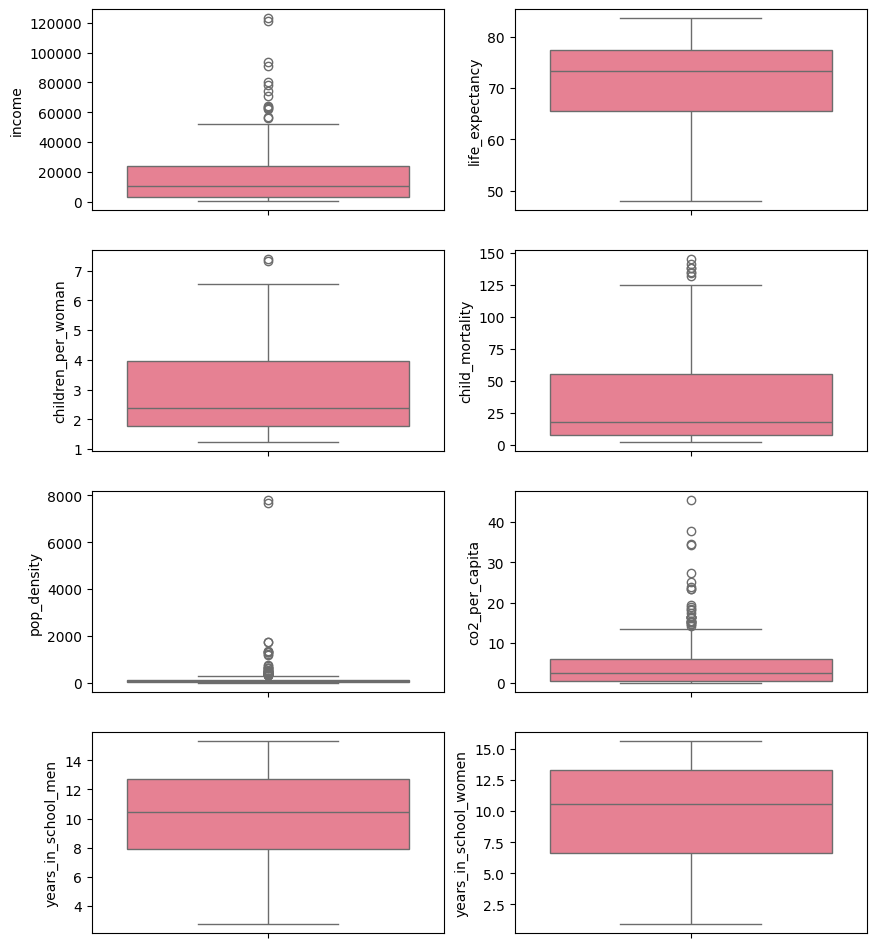

In [87]:
# Create a list using the features that contain numerical data
column_list_plot = [
    "income",
    "life_expectancy",
    "children_per_woman",
    "child_mortality",
    "pop_density",
    "co2_per_capita",
    "years_in_school_men",
    "years_in_school_women",
]

# Create a 4x2 figure with 8 subplots, where 8 of them will be used
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Use a for loop to create the subplots
for index, col_name in enumerate(column_list_plot):
    sns.boxplot(ax=axes[index], y=col_name, data=data_period)

As expected, the box plots for four of the features (`income`, `child_mortality`, `pop_density `  and `co2_emissions`) show many outliers, but this isn't the full picture. An accurate analysis of the outliers requires to plot the data split into continents.

<ipython-input-88-28821a18bb68>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-88-28821a18bb68>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-88-28821a18bb68>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-88-28821a18bb68>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-88-28821a18bb68>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

Text(0.5, 0.98, 'Box Plots of Numerical Features by Region')

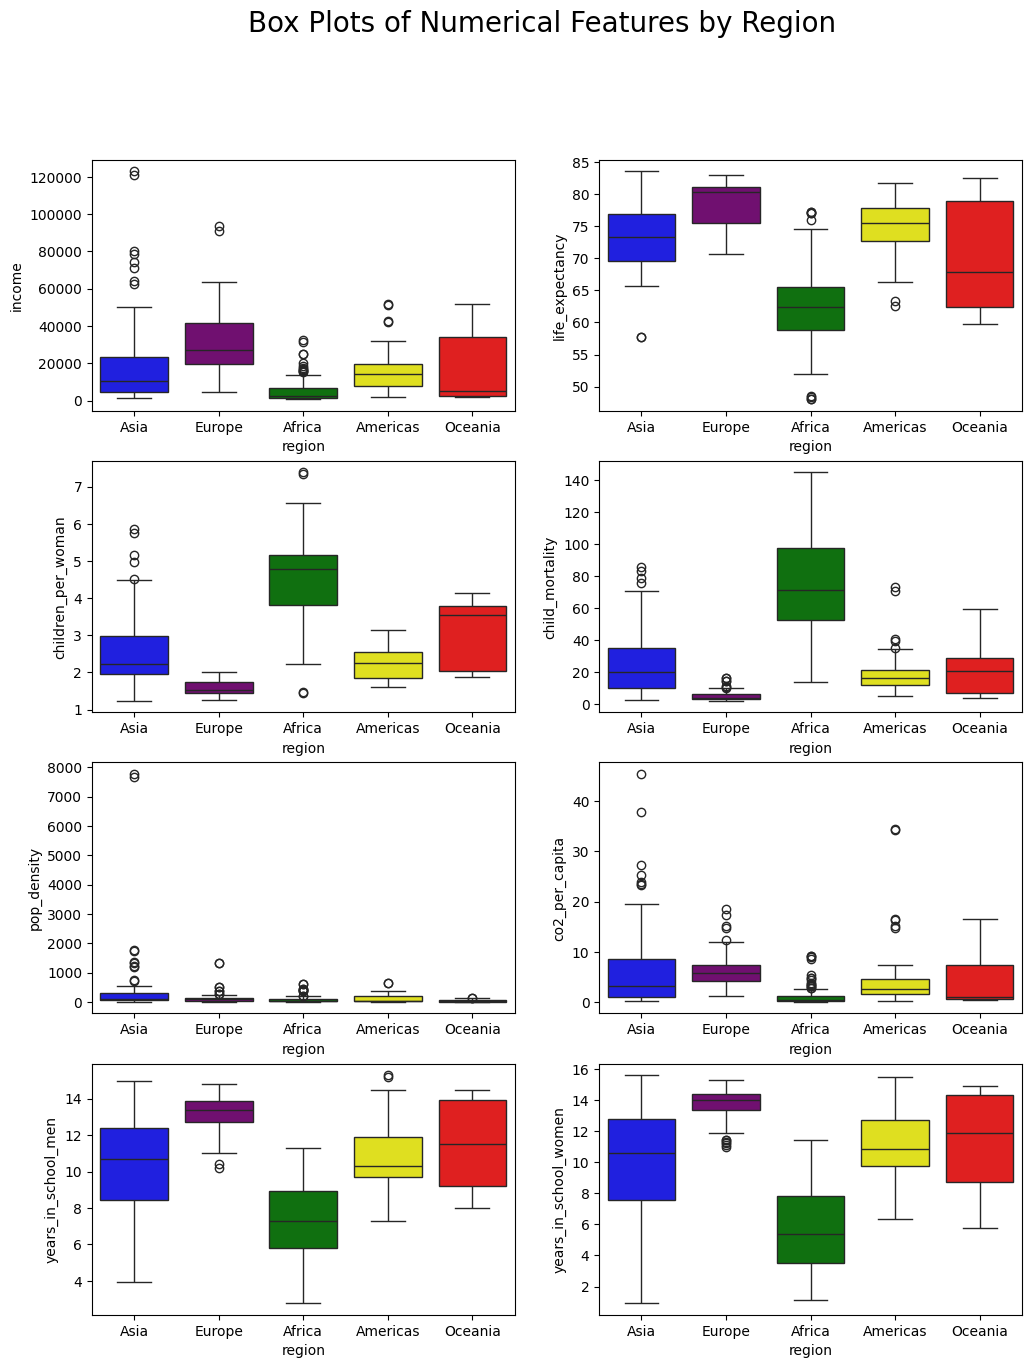

In [88]:
# Create a list of colors for different regions
region_colors = {
    "Africa": "green",
    "Americas": "yellow",
    "Asia": "blue",
    "Europe": "purple",
    "Oceania": "red",
}

# Create a 4x2 figure with 8 subplots, Where 8 of them will be used
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Use a for loop to create the subplots
for index, col_name in enumerate(column_list_plot):
    sns.boxplot(ax=axes[index], x="region", y=col_name, data=data_period, palette=region_colors)

# Add a title to the entire figure
fig.suptitle("Box Plots of Numerical Features by Region", fontsize=20)


Actually, these box plots show more outliers than the previous graphs. As studied in this course, the presence of outliers can be due to errors in the measurement, but it can also be right. Let's have a look at data belonging to `Oceania` to understand the reason behind the outliers:

In [89]:
data_period[data_period["region"] == "Oceania"]

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
358,Australia,2013,23200000,Oceania,Australia and New Zealand,High,82.5,42900,1.89,4.2,3.01,16.100,13.90,14.30
359,Australia,2014,23500000,Oceania,Australia and New Zealand,High,82.6,43400,1.87,4.0,3.06,15.400,14.00,14.40
2336,Fiji,2013,880000,Oceania,Melanesia,Upper middle,65.5,7980,2.59,23.4,48.20,1.310,11.40,11.80
2337,Fiji,2014,886000,Oceania,Melanesia,Upper middle,65.5,8350,2.57,23.0,48.50,1.320,11.50,11.90
3686,Kiribati,2013,109000,Oceania,Micronesia,Lower middle,61.2,1830,3.77,58.8,134.00,0.574,9.36,9.70
3687,Kiribati,2014,110000,Oceania,Micronesia,Lower middle,61.4,1840,3.73,57.4,136.00,0.564,9.48,9.85
4928,New Zealand,2013,4520000,Oceania,Australia and New Zealand,High,81.5,33800,2.05,5.9,17.20,7.410,14.20,14.80
4929,New Zealand,2014,4570000,Oceania,Australia and New Zealand,High,81.5,34500,2.03,5.7,17.30,7.590,14.30,14.90
5358,Papua New Guinea,2013,7590000,Oceania,Melanesia,Lower middle,59.8,2470,3.81,59.5,16.80,0.815,8.01,5.75
5359,Papua New Guinea,2014,7760000,Oceania,Melanesia,Lower middle,60.1,2620,3.76,57.9,17.10,0.815,8.15,5.89


We can see that the outliers from the `income` column are Australia and New Zealand. These values represent actual data and removing them would cause a loss of data.
The same can be said regarding the `child_mortality`, `pop_density `  and `co2_per_capita` besides any other feature for any other continents. Therefore, ***The outliers would not be removed***.

## Exploratory Data Analysis

##Univariate Analysis

In [90]:

# For numerical attributes, let's describe the dataset to get mean, median, etc.
data.describe()

,year,population,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
count,7717.000000,7.717000e+03,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000
mean,1992.435921,3.313877e+07,66.028768,12962.267850,3.913842,74.726785,136.687679,4.665658,7.720621,6.981117
std,12.979325,1.188602e+08,9.654891,17553.735789,1.990729,73.384581,417.938633,7.215037,3.190283,3.888600
min,1970.000000,5.120000e+04,12.600000,247.000000,1.120000,2.300000,0.823000,0.004330,0.900000,0.210000
25%,1981.000000,2.440000e+06,58.700000,2280.000000,2.060000,17.000000,18.000000,0.421000,5.180000,3.600000
50%,1993.000000,7.120000e+06,68.400000,6560.000000,3.480000,46.700000,53.400000,1.870000,7.680000,7.030000
75%,2004.000000,2.080000e+07,73.600000,16600.000000,5.710000,113.000000,122.000000,6.570000,10.200000,10.100000
max,2014.000000,1.390000e+09,83.600000,178000.000000,8.870000,399.000000,7780.000000,87.700000,15.300000,15.600000


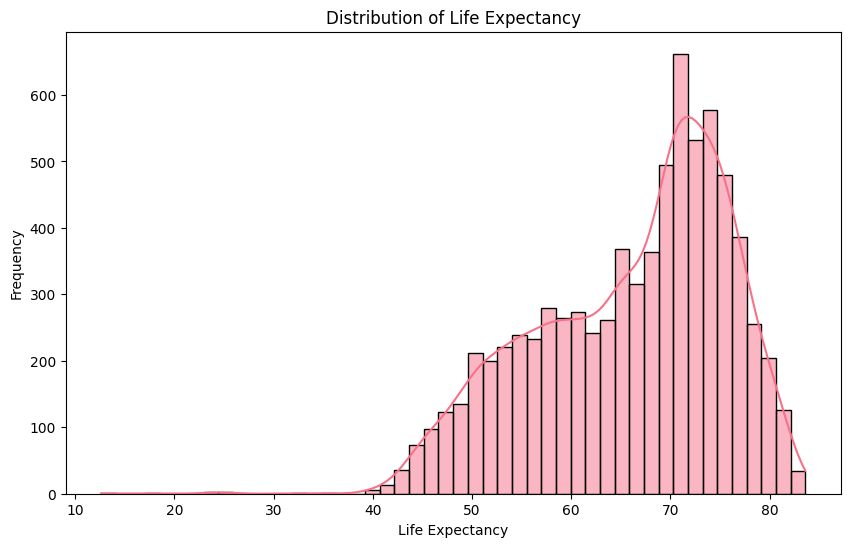

In [91]:
# Visualizing distributions of numerical attributes
# Histogram for Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(data['life_expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

Here, we can see Life Expectancy is left-skewed, which means that most of the data points are concentrated towards the higher end of the scale, while a few extreme values (outliers) pull the distribution towards the lower end. In other words, the majority of countries or regions tend to have relatively high life expectancies, but there are a few places with significantly lower life expectancies that drag the overall distribution to the left.
This skewness can occur due to various factors, such as differences in healthcare, socioeconomic conditions, and lifestyle choices etc.


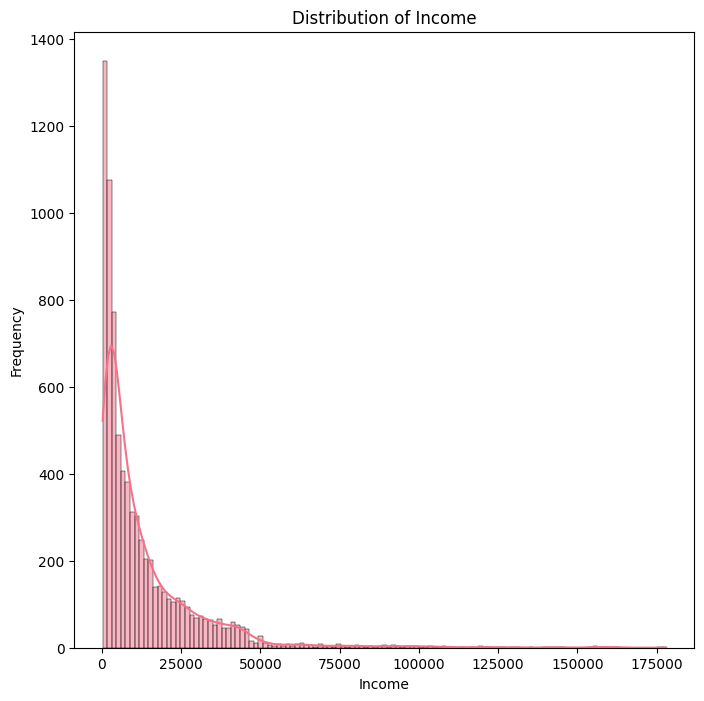

In [92]:
# Histogram for Income
plt.figure(figsize=(8, 8))
sns.histplot(data['income'], kde=True)  # Replace 'income' with the relevant column name
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The right-skewed distribution of income indicates that most data points are concentrated towards the lower end of the income scale, while a few extreme values (outliers) pull the distribution towards the higher end. In other words, the majority of individuals tend to have relatively lower incomes, but there are a few high-income outliers that stretch the overall distribution to the right.
Factors contributing to this skewness include income disparities, wealth concentration, and economic inequality.


## Bivariate Analysis
1. Line Charts
2. Scatter Plots
3. Correlation plots

In [93]:
## Line Charts or Visualizing the trend
life_expectancy_regional_data = data.groupby(['region', 'year'], as_index= False).agg({'life_expectancy': 'mean'})
print(life_expectancy_regional_data)

      region  year  life_expectancy
0     Africa  1970        51.029787
1     Africa  1971        51.374468
2     Africa  1972        51.364583
3     Africa  1973        52.268750
4     Africa  1974        52.650000
..       ...   ...              ...
220  Oceania  2010        69.240000
221  Oceania  2011        69.400000
222  Oceania  2012        69.500000
223  Oceania  2013        69.700000
224  Oceania  2014        69.770000

[225 rows x 3 columns]


In [94]:
import plotly.express as px
import plotly.graph_objects as go

#Comparing Life expectancy among regions
fig = px.line(data_frame= life_expectancy_regional_data, x='year', y='life_expectancy', color='region', labels = {'year': 'Year', 'life_expectancy': 'Life Expectancy'}, title = '% Employed in the Life Expectancy Across Time')
fig.show()

Although Europe has the highest life_expectancy index and Africa having the lowest index, Asia seems to have the highest rate of increase in Life expectancy!

### Let's now take a look at our Income Plots

In [95]:
income_region_data = data.groupby(['region', 'year'], as_index= False).agg({'income': 'mean'})
print(income_region_data)

      region  year        income
0     Africa  1970   3866.170213
1     Africa  1971   3826.659574
2     Africa  1972   3676.395833
3     Africa  1973   3712.062500
4     Africa  1974   3791.562500
..       ...   ...           ...
220  Oceania  2010  14938.000000
221  Oceania  2011  15142.000000
222  Oceania  2012  15381.000000
223  Oceania  2013  15534.000000
224  Oceania  2014  15796.000000

[225 rows x 3 columns]


In [96]:
fig = px.line(data_frame=income_region_data, x='year', y='income', color='region', labels = {'year': 'Year', 'income': 'Income'}, title = '% Employed in Income Across Time')
#add annotations
fig.show()

Percentage employed in Income is the highest in Europe, with Africa at the lowest %.

### Now we are able to get ideas about our initial 2 questions: How have socio-economic indicators evolved globally over the years? Can we predict future trends in key indicators?

Which region has the highest Life Expectancy? Is it the same for Income? Europe has the highest Life Expectancy and Income value across time, and Africa at the lowest for both

## What about Life expectancy and Income values for countries in each continent?

Let's start by grouping and aggregating our data!
We will examine Life Expectancy first

In [97]:
life_exp_ctry_region_data = data.groupby(['country','region', 'year'], as_index= False).agg({'life_expectancy': 'mean'})
print(life_exp_ctry_region_data)

          country  region  year  life_expectancy
0     Afghanistan    Asia  1970             45.8
1     Afghanistan    Asia  1971             45.9
2     Afghanistan    Asia  1972             45.9
3     Afghanistan    Asia  1973             46.0
4     Afghanistan    Asia  1974             46.1
...           ...     ...   ...              ...
7712     Zimbabwe  Africa  2010             49.6
7713     Zimbabwe  Africa  2011             51.9
7714     Zimbabwe  Africa  2012             54.1
7715     Zimbabwe  Africa  2013             55.6
7716     Zimbabwe  Africa  2014             57.0

[7717 rows x 4 columns]


#### Let's examine Americas' Life Expectancy

In [98]:
ame_lif_exp = life_exp_ctry_region_data[life_exp_ctry_region_data.region=='Americas']
print(ame_lif_exp)

                  country    region  year  life_expectancy
180   Antigua and Barbuda  Americas  1970             66.8
181   Antigua and Barbuda  Americas  1971             67.2
182   Antigua and Barbuda  Americas  1972             67.6
183   Antigua and Barbuda  Americas  1973             68.0
184   Antigua and Barbuda  Americas  1974             68.3
...                   ...       ...   ...              ...
7532            Venezuela  Americas  2010             75.4
7533            Venezuela  Americas  2011             75.4
7534            Venezuela  Americas  2012             75.3
7535            Venezuela  Americas  2013             75.4
7536            Venezuela  Americas  2014             75.5

[1395 rows x 4 columns]


In [99]:
px.line(data_frame= ame_lif_exp, x='country', y='life_expectancy', animation_frame='year', title='Life Expectancy in Americas (PLZ USE AUTOSCALE FOR THE LINE TO SEE)', range_y=[0.4,1])



Life Expectancy Index for United States and canada are the highest in Americas where Haiti has the least life expectancy

### Examining Income data by Country

In [100]:
income_ctry_region_data = data.groupby(['country','region', 'year'], as_index= False).agg({'income': 'mean'})
income_ctry_region_data

,country,region,year,income
0,Afghanistan,Asia,1970,1180.0
1,Afghanistan,Asia,1971,1100.0
2,Afghanistan,Asia,1972,1050.0
3,Afghanistan,Asia,1973,1150.0
4,Afghanistan,Asia,1974,1180.0
...,...,...,...,...
7712,Zimbabwe,Africa,2010,1460.0
7713,Zimbabwe,Africa,2011,1660.0
7714,Zimbabwe,Africa,2012,1850.0
7715,Zimbabwe,Africa,2013,1900.0


#### Taking a look at America Again

In [101]:
am_income = income_ctry_region_data[income_ctry_region_data.region=='Americas']
#am_services
px.line(data_frame = am_income,x='country', y='income', animation_frame='year', title='Income in Americas (PLZ USE AUTOSCALE FOR THE LINE TO SEE)',range_y=[35,90])


We see that, income seems very much aligned with life expectancy. As United states and Canada again score highest in Americans regions. On the other hand, Guatemala, Haiti & Honduras' income data had not changed likely life expectancy. Haiti's income value as well as Life Expectancy are lower than Guatemala's & Honduras

### Let's plot Life Expectancy against Income to have a better understanding!

In [102]:
## 2 Scatter plots to see the picture

fig = px.scatter(data,x = "life_expectancy",  y = "income",  title = 'Life expectancy and income Plot Across Time in Americas (PLZ USE AUTOSCALE FOR THE LINE TO SEE)',
                 color = "region",animation_frame="year", range_x=[0,1], range_y= [0,100])
fig.show()

Life Expectancy is on the increasing trend over time in Americas regions where it is not significantly influced by income level

We can see higher income is highly correlated with Life expectancy and gradually increase upto a certain level.


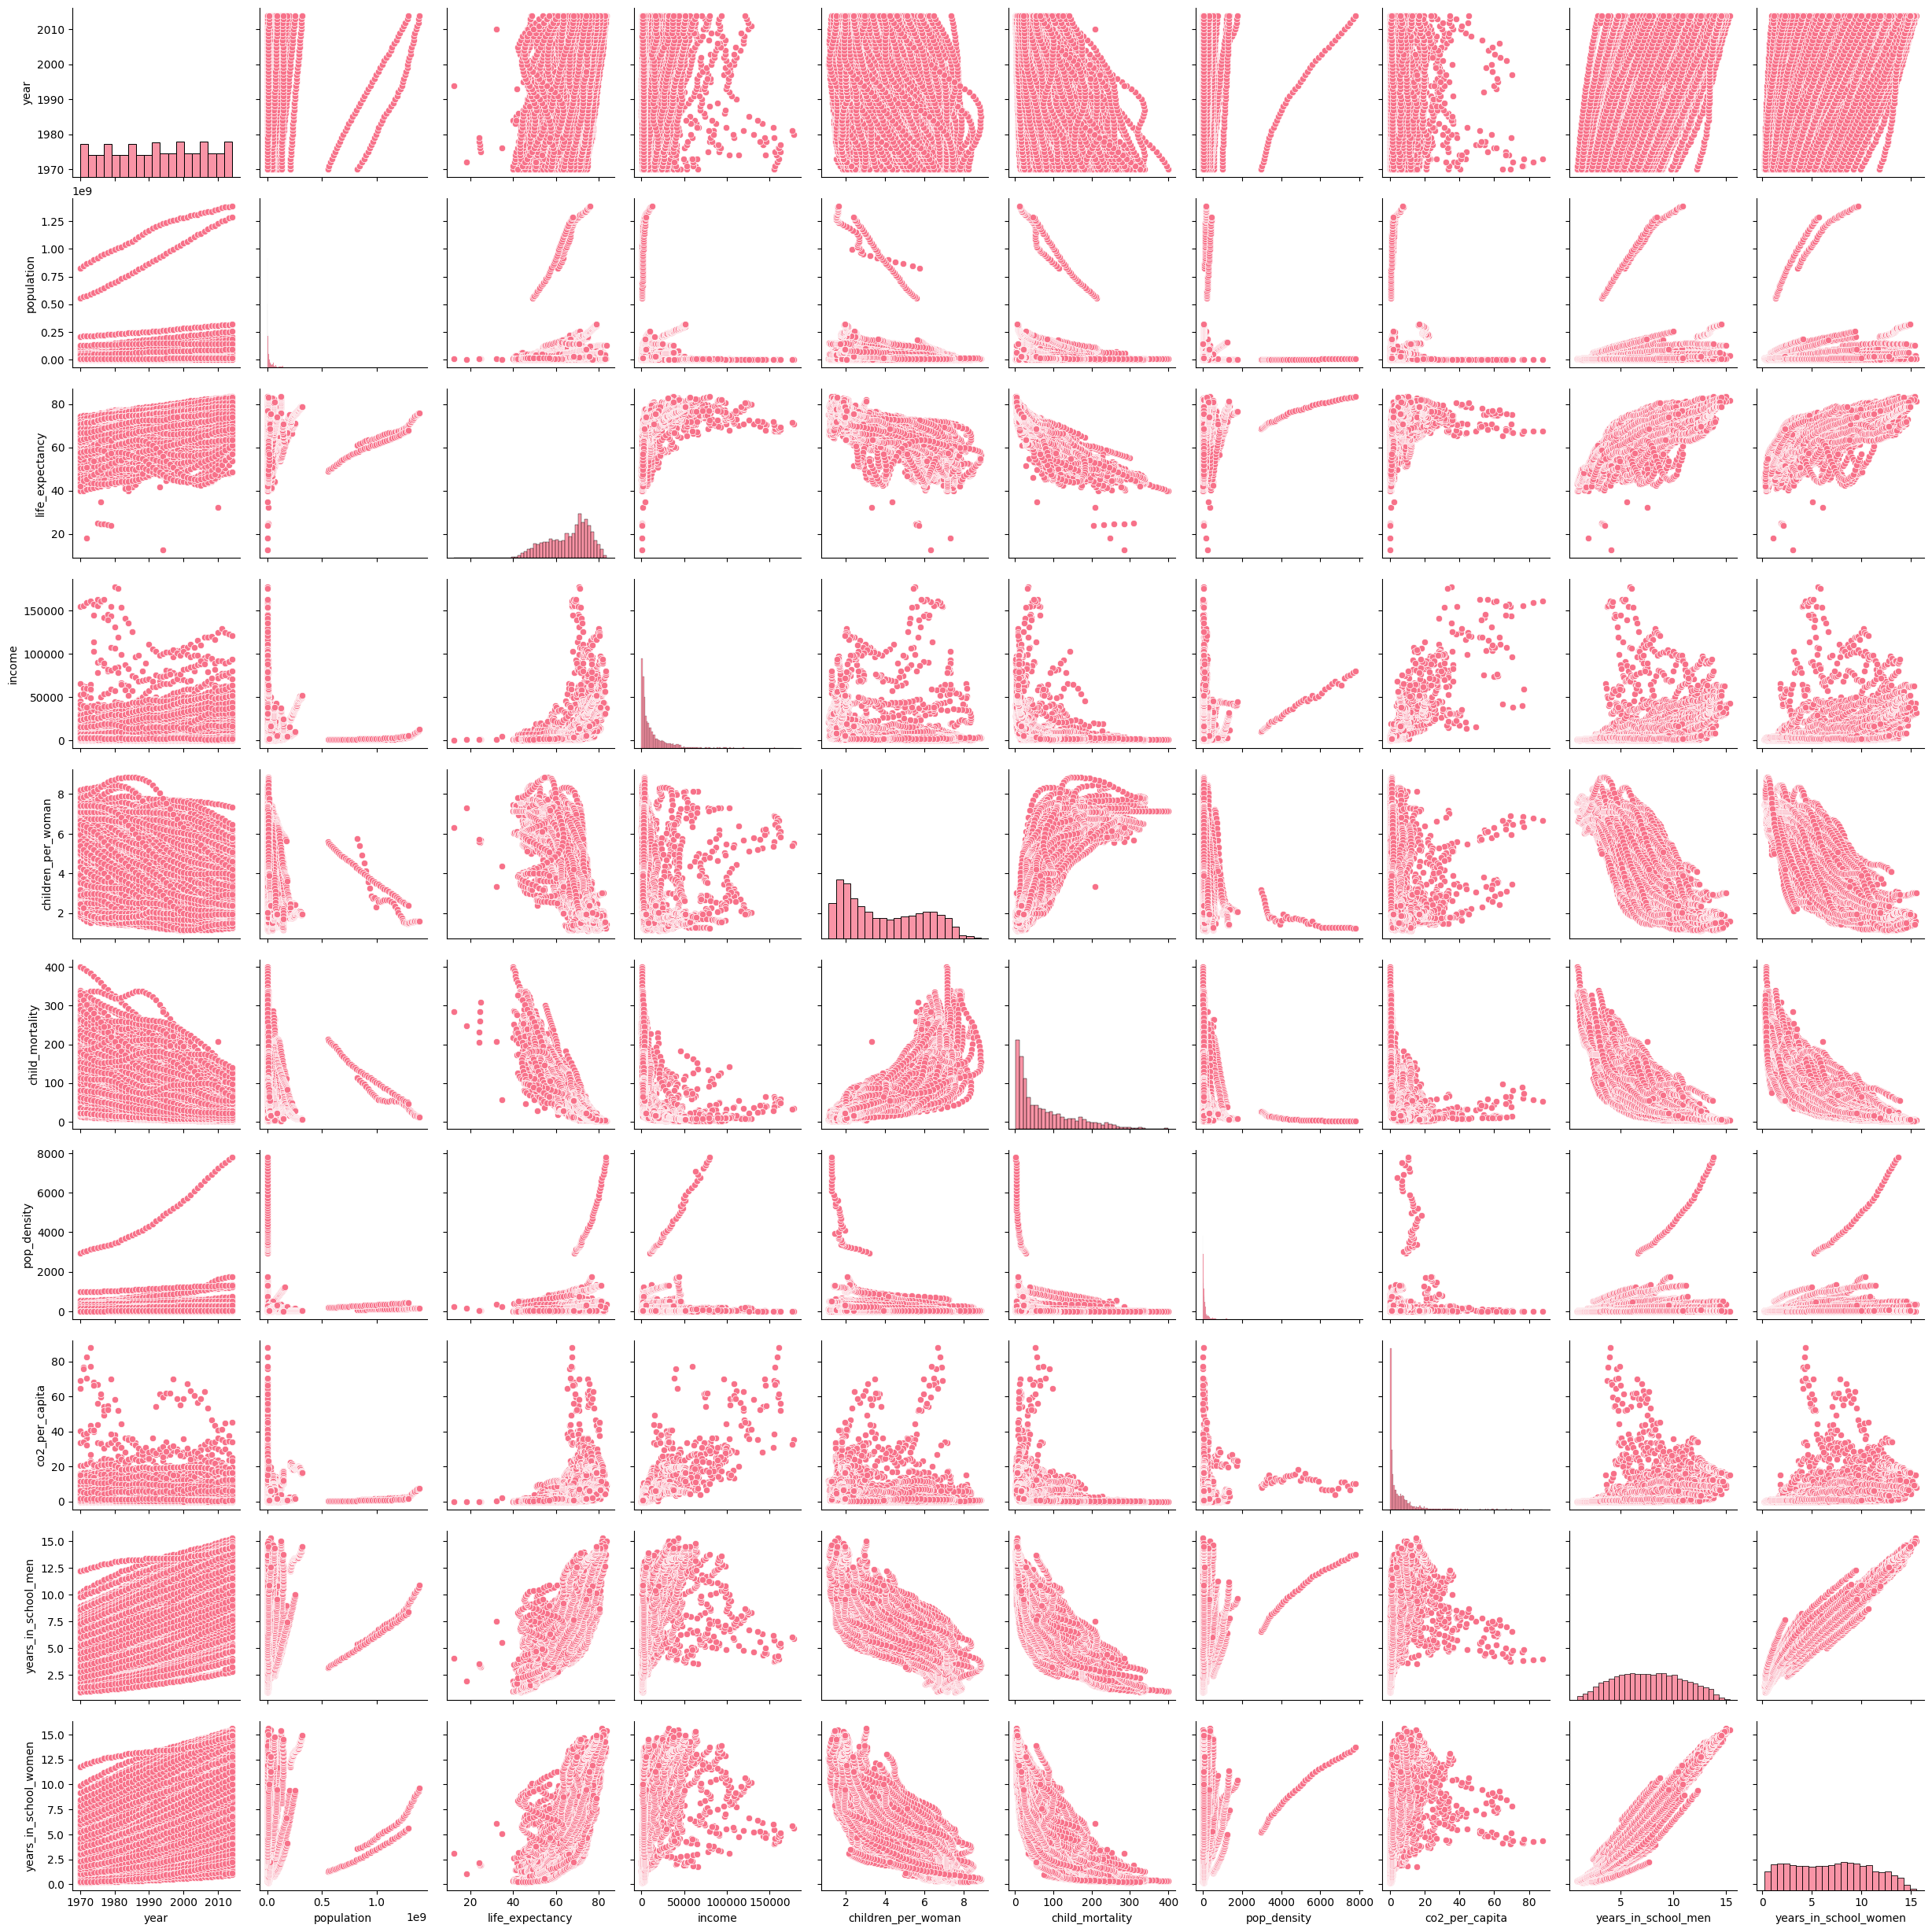

<Figure size 1000x1500 with 0 Axes>

In [103]:
## Lets see the relationship among different variables

# Pairplot to visualize relationships
sns.pairplot(data)

# Adjust the plot size
plt.figure(figsize=(10, 15))

# Show the plot
plt.show()

In [104]:
4  # 3 Correlation Analysis
## Let's calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                           year  population  life_expectancy    income  \
year                   1.000000    0.045262         0.318198  0.118619   
population             0.045262    1.000000         0.036585 -0.025842   
life_expectancy        0.318198    0.036585         1.000000  0.534823   
income                 0.118619   -0.025842         0.534823  1.000000   
children_per_woman    -0.383632   -0.111739        -0.810229 -0.379525   
child_mortality       -0.383741   -0.037471        -0.893179 -0.443640   
pop_density            0.066457    0.014499         0.165861  0.152944   
co2_per_capita        -0.013448    0.007397         0.428303  0.809062   
years_in_school_men    0.481321    0.052143         0.774083  0.448381   
years_in_school_women  0.436158    0.010254         0.783480  0.462974   

                       children_per_woman  child_mortality  pop_density  \
year                            -0.383632        -0.383741     0.066457   
population                      -0.

<ipython-input-104-3d3b8c7d9b3a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



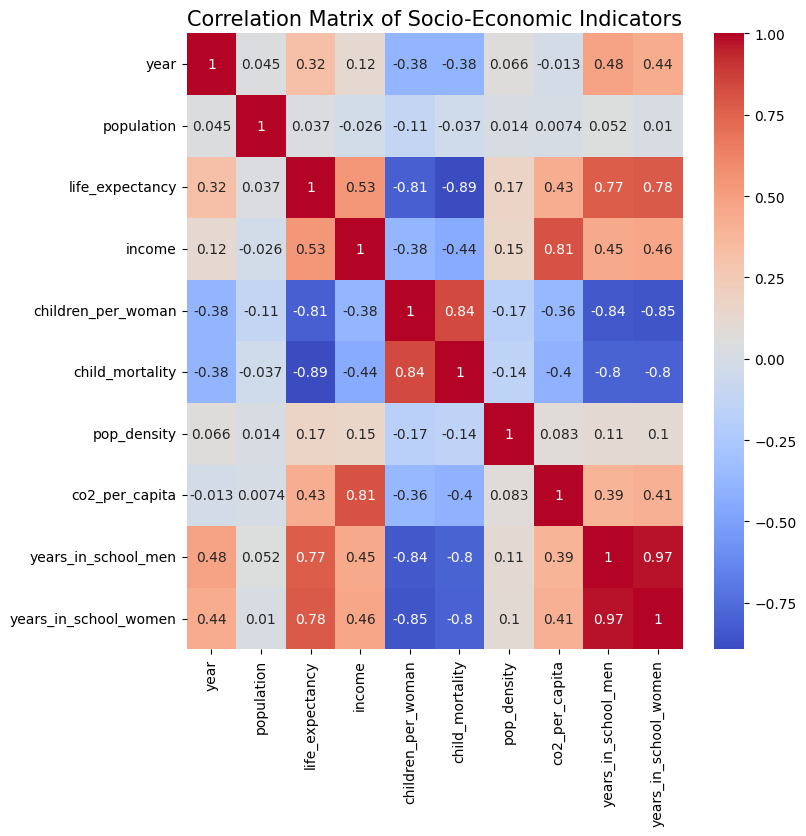

In [105]:
## Visualizing the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Socio-Economic Indicators', fontsize=15)
plt.show()

# Feature Selection

Feature selection is a crucial step in machine learning and data analysis. It involves choosing a subset of relevant features (variables) from your dataset to build a more effective model.
Another step of the feature engineering process is to to create classes of the categorical data  and the resulting labels are encoded as integers (0, 1, 2)

In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Considering features for
features = ['year', 'population', 'life_expectancy', 'children_per_woman', 'child_mortality', 'pop_density', 'co2_per_capita', 'years_in_school_men']
X = data[features]
y_regression = data['income']  # Regression target
y_classification = pd.qcut(data['life_expectancy'], q=3, labels=False)  # Classification target, dividing life expectancy into 3 classes


##Data Preprocessing


In [107]:
# Split the data into train and test sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Model Selection, Training, and Evaluation

Regression Models


In [108]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_reg)
lr_score = cross_val_score(lr, X_train_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression RMSE: {np.sqrt(-lr_score.mean())}")

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train_reg)
rf_reg_score = cross_val_score(rf_reg, X_train_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Regressor RMSE: {np.sqrt(-rf_reg_score.mean())}")

# Support Vector Regressor
svr = SVR()
svr.fit(X_train_scaled, y_train_reg)
svr_score = cross_val_score(svr, X_train_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error')
print(f"SVR RMSE: {np.sqrt(-svr_score.mean())}")


Linear Regression RMSE: 9146.103687168454
Random Forest Regressor RMSE: 3572.6417940143915
SVR RMSE: 18803.063264451783


________

Classification Models

In [109]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_cls)
log_reg_score = cross_val_score(log_reg, X_train_scaled, y_train_cls, cv=5, scoring='accuracy')
print(f"Logistic Regression Accuracy: {log_reg_score.mean()}")

# Random Forest Classifier
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train_scaled, y_train_cls)
rf_cls_score = cross_val_score(rf_cls, X_train_scaled, y_train_cls, cv=5, scoring='accuracy')
print(f"Random Forest Classifier Accuracy: {rf_cls_score.mean()}")

# Support Vector Classifier
svc = SVC()
svc.fit(X_train_scaled, y_train_cls)
svc_score = cross_val_score(svc, X_train_scaled, y_train_cls, cv=5, scoring='accuracy')
print(f"SVC Accuracy: {svc_score.mean()}")


Logistic Regression Accuracy: 0.9872022782301721
Random Forest Classifier Accuracy: 1.0
SVC Accuracy: 0.975377135020571


##Finalizing the Most Accurate Model

After running the above code, we compare the RMSE for regression models and accuracy for classification models.

##The model with the lowest RMSE (Random Forest Regressor)or highest accuracy (Random Forest Classifier), respectively, should be considered the best model for this particular dataset and research questions.

This approach provides a comprehensive answer to the posed research questions, utilizing machine learning to explore socio-economic indicators and predict future trends.

# Key Notes and insights

The intial analysis has helped to draw the following conclusions about the data:
* The null values exist for a reason and imputing them using any other value would lead to wrong conclusions about the data set.
* Similarly, the presence of outliers is nott due to error measurement. Removing these values would lead to wrong results and inferences about the data.
* The pair plot and correlation heat map help the most identifying the relationship of the different features.